<a href="https://colab.research.google.com/github/ecierobatto/week_7/blob/main/Moringa_School_Independent_Project_Week7_9_2021_Esther_Robert_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

# 2. Importing Libraries

In [1224]:
# Importing Pandas
# 
import pandas as pd

In [1225]:
# Importing Numpy
#
import numpy as np

In [1226]:
# Importing Seaborn
#
import seaborn as sns

In [1227]:
# Importing Matplotlib
#
import matplotlib.pyplot as plt

# 3. Loading Dataset

In [1228]:
# loading dataset
finance_data = pd.read_csv('/content/Financial Dataset - 1.csv')
finance_data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# 4.  Checking the Data

In [1229]:
# checking for dataset information
finance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [1230]:
# displaying descriptive statistics for all the columns
finance_data.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_88,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [1231]:
# displaying number of entries in the dataset
print(finance_data.shape)

(23524, 13)


In [1232]:
# displaying total number of attributes & unique values of the columns
print(finance_data.nunique())

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64


In [1233]:
# renaming the columns by adding underscores for uniformity
new_finance_data = finance_data.rename({'Has a Bank account': 'has_a_bank_account', 'Type of Location': 'type_of_location','Cell Phone Access': 'cell_phone_access', 'Respondent Age': 'respondent_age', 'The relathip with head': 'the_relationship_with_head', 'Level of Educuation': 'level_of_education', 'Type of Job': 'type_of_job'}, axis=1)
new_finance_data

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [1234]:
# Identifying Non-Categorical columns
num_cols = new_finance_data._get_numeric_data().columns
num_cols

Index(['year', 'household_size', 'respondent_age'], dtype='object')

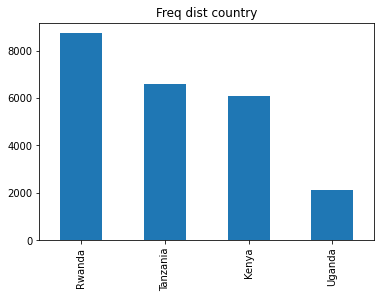

In [1235]:
# function to plot the univariate distribution of the Categorical columns
col_names = ['country', 'type_of_location ', 'cell_phone_access', 'gender_of_respondent ', 'the_relationship_with_head ', 'marital_status', 'level_of_education', 'type_of_job']
def drawCategorical(item):
  draw = new_finance_data[item].value_counts().plot.bar(title='Freq dist '+item)
  if item == col_names:
    return draw
# bar chart for country column
drawCategorical('country')
# bar chart for 'type_of_location' column
# drawCategorical('type_of_location')
# bar chart for 'cell_phone_access' column
# drawCategorical('cell_phone_access')
# bar chart for 'gender_of_respondent' column
# drawCategorical('gender_of_respondent')
# bar chart for 'the_relationship_with_head' column
# drawCategorical('the_relationship_with_head')
# bar chart for 'marital_status' column
# drawCategorical('marital_status')
# bar chart for 'level_of_educuation' column
# drawCategorical('level_of_educuation')
# bar chart for 'type_of_job' column
# drawCategorical('type_of_job')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


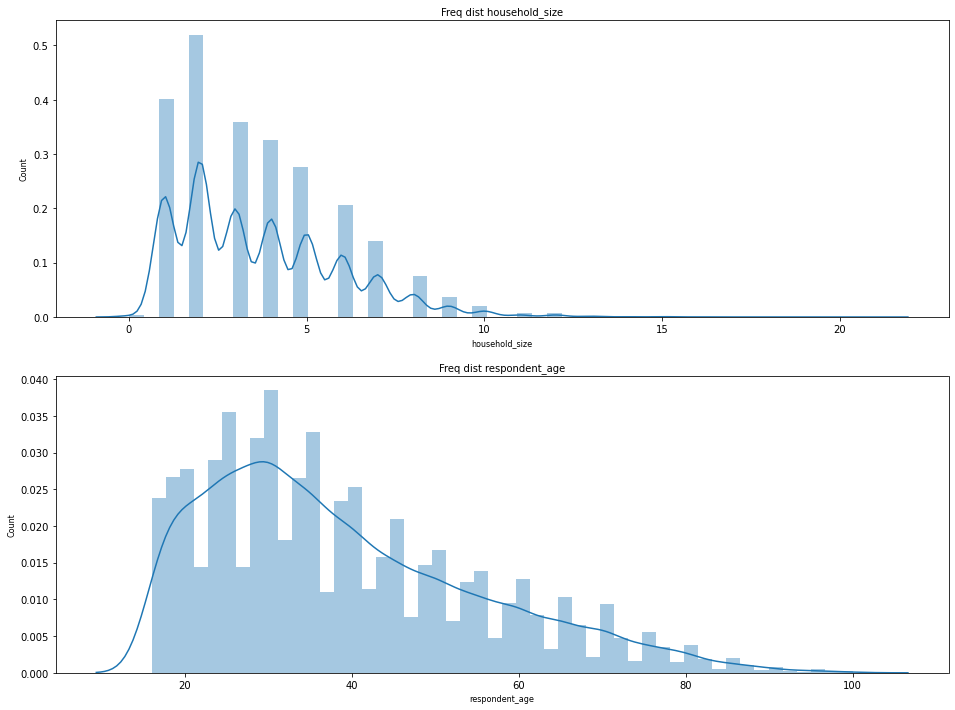

In [1236]:
# plotting the univariate distribution of the numerical columns
col_names = ['household_size','respondent_age']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(new_finance_data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

# 5. Cleaning Data

In [1237]:
# Checking if there are null values in the dataset
new_finance_data.isnull().values.any()

True

In [1238]:
# Total number of missing values
new_finance_data.isnull().sum()

country                       14
year                           0
uniqueid                       0
has_a_bank_account            36
type_of_location              15
cell_phone_access             11
household_size                28
respondent_age                34
gender_of_respondent          34
the_relationship_with_head     4
marital_status                32
level_of_education            29
type_of_job                   30
dtype: int64

In [1239]:
# displaying the null values in the 'country' column 
countryNA = pd.isnull(new_finance_data["country"]) 
new_finance_data[countryNA]


,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
18200,NaN,2017,uniqueid_3398,No,Urban,Yes,1.0,25.0,Female,Spouse,Single/Never Married,Primary education,Remittance Dependent
18201,NaN,2017,uniqueid_3399,No,Urban,No,1.0,60.0,Female,Head of Household,Widowed,Primary education,Self employed
18202,NaN,2017,uniqueid_3400,No,Urban,Yes,1.0,19.0,Female,Spouse,Single/Never Married,Primary education,No Income
18203,NaN,2017,uniqueid_3401,No,Urban,No,1.0,62.0,Female,Head of Household,Widowed,No formal education,Self employed
18204,NaN,2017,uniqueid_3402,No,Urban,No,2.0,42.0,Female,Head of Household,Widowed,No formal education,Self employed
18205,NaN,2017,uniqueid_3403,No,Rural,No,3.0,18.0,Male,Child,Divorced/Seperated,Secondary education,Remittance Dependent
18206,NaN,2017,uniqueid_3404,No,Urban,Yes,2.0,73.0,Female,Head of Household,Married/Living together,No formal education,Self employed
18207,NaN,2017,uniqueid_3405,No,Urban,No,1.0,40.0,Male,Head of Household,Widowed,No formal education,Self employed
18208,NaN,2017,uniqueid_3406,No,Urban,No,3.0,28.0,Male,Parent,Married/Living together,No formal education,Self employed
18312,NaN,2017,uniqueid_3510,No,Urban,No,2.0,19.0,Male,Parent,Divorced/Seperated,Secondary education,No Income


In [1240]:
# determining the method to fill the null values based on the country column
# 'country' values at different indices 
new_finance_data.values[18199]
#new_finance_data.values[18311]
#new_finance_data.values[18317]



array(['Tanzania', 2017, 'uniqueid_3397', 'No', 'Urban', 'No', 2.0, 46.0,
       'Female', 'Spouse', 'Single/Never Married', 'Primary education',
       'Self employed'], dtype=object)

In [1241]:
# filling null values using forward fill
fill_null = new_finance_data.ffill(axis = 0)
fill_null

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [1242]:
# checking if the null values are filled using 'country' column
fill_null[countryNA]


,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
18200,Tanzania,2017,uniqueid_3398,No,Urban,Yes,1.0,25.0,Female,Spouse,Single/Never Married,Primary education,Remittance Dependent
18201,Tanzania,2017,uniqueid_3399,No,Urban,No,1.0,60.0,Female,Head of Household,Widowed,Primary education,Self employed
18202,Tanzania,2017,uniqueid_3400,No,Urban,Yes,1.0,19.0,Female,Spouse,Single/Never Married,Primary education,No Income
18203,Tanzania,2017,uniqueid_3401,No,Urban,No,1.0,62.0,Female,Head of Household,Widowed,No formal education,Self employed
18204,Tanzania,2017,uniqueid_3402,No,Urban,No,2.0,42.0,Female,Head of Household,Widowed,No formal education,Self employed
18205,Tanzania,2017,uniqueid_3403,No,Rural,No,3.0,18.0,Male,Child,Divorced/Seperated,Secondary education,Remittance Dependent
18206,Tanzania,2017,uniqueid_3404,No,Urban,Yes,2.0,73.0,Female,Head of Household,Married/Living together,No formal education,Self employed
18207,Tanzania,2017,uniqueid_3405,No,Urban,No,1.0,40.0,Male,Head of Household,Widowed,No formal education,Self employed
18208,Tanzania,2017,uniqueid_3406,No,Urban,No,3.0,28.0,Male,Parent,Married/Living together,No formal education,Self employed
18312,Tanzania,2017,uniqueid_3510,No,Urban,No,2.0,19.0,Male,Parent,Divorced/Seperated,Secondary education,No Income


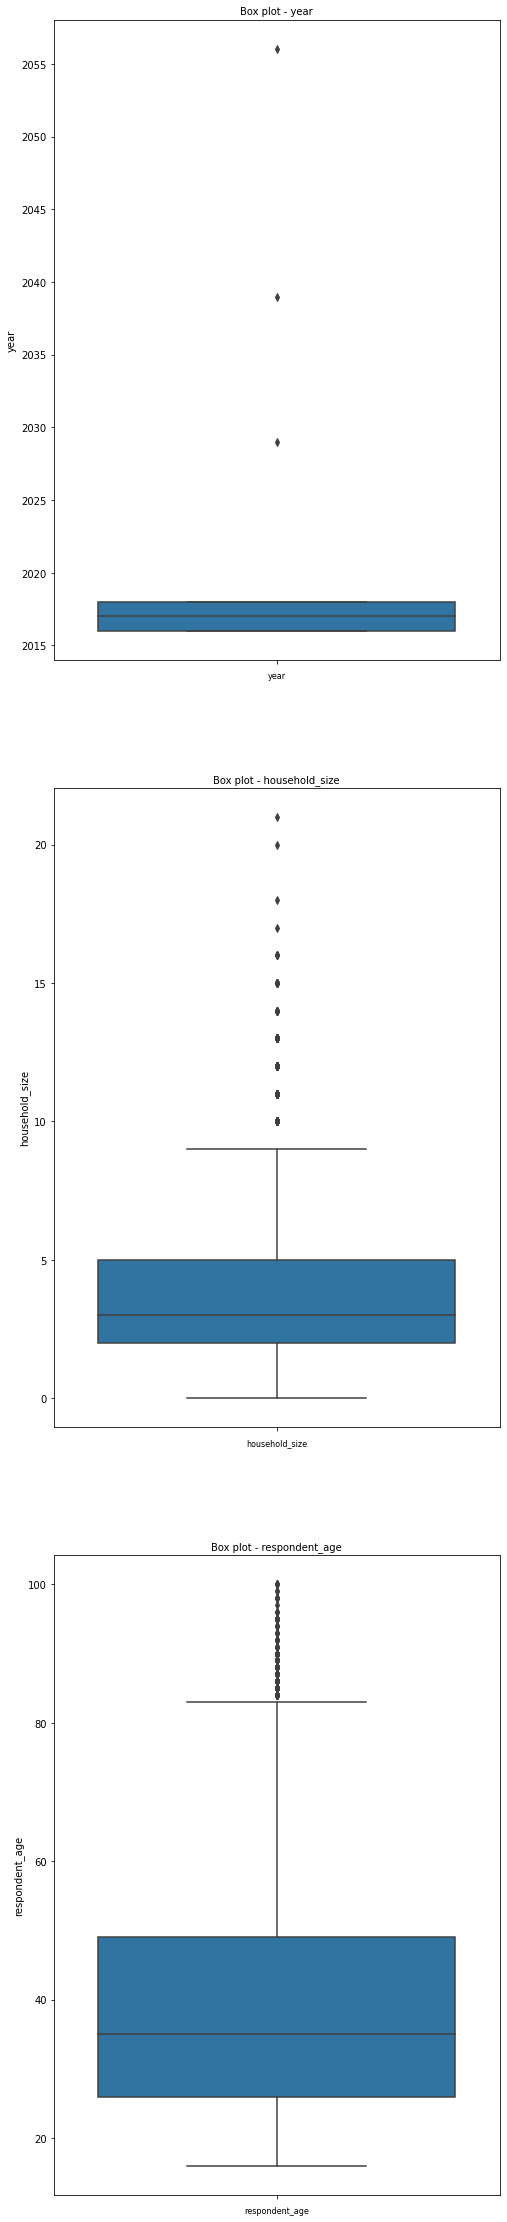

In [1243]:
# checking for outliers
col_names = ['year', 'household_size','respondent_age']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=fill_null[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

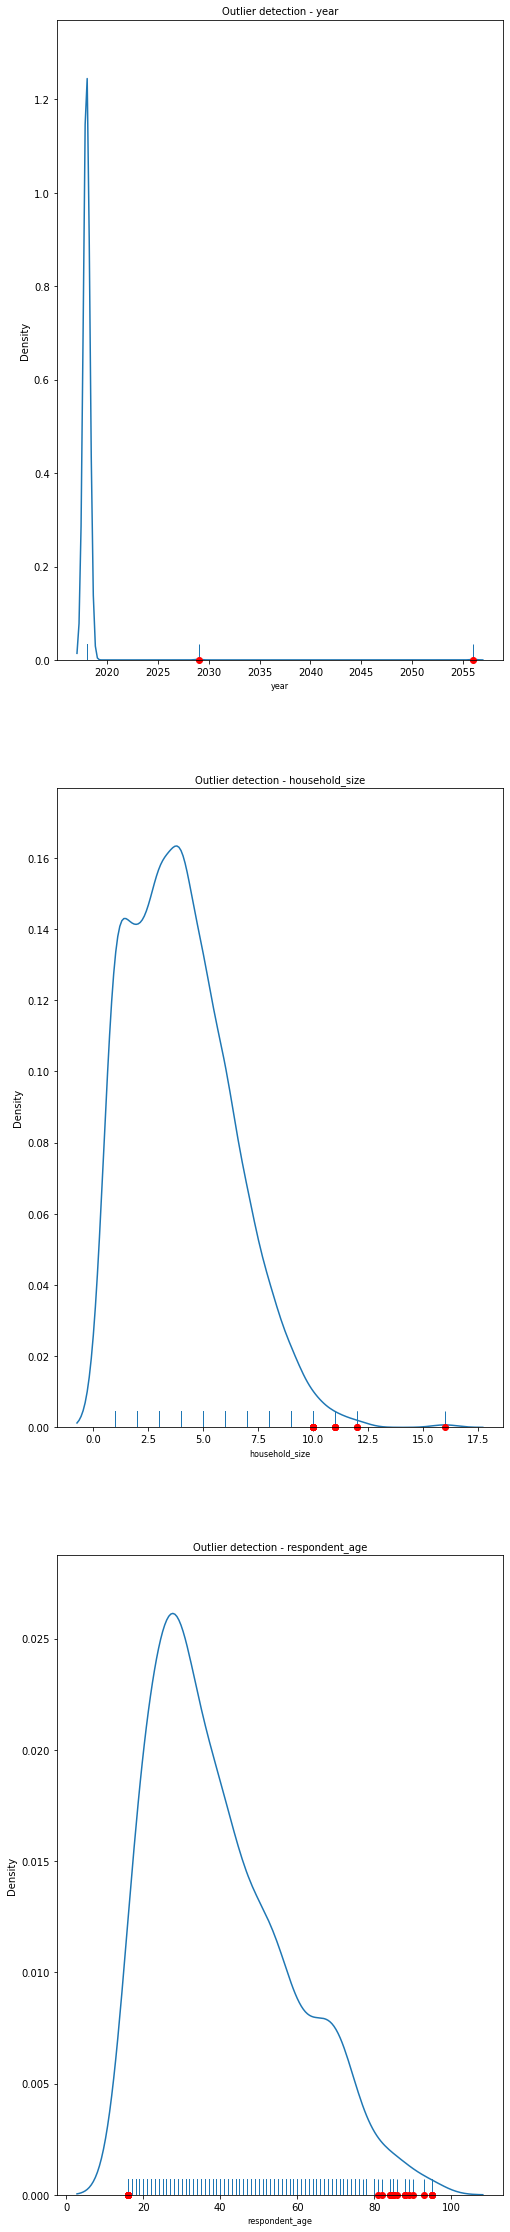

In [1244]:
# removing Numeric outliers using Percentile Outlier Removal Technique

def percentile_based_outlier(data, threshold=95):
     diff = (100 - threshold) / 2
     minval, maxval = np.percentile(data, [diff, 100 - diff])
     return (data < minval) | (data > maxval)
col_names = ['year', 'household_size','respondent_age']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = fill_null[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [1245]:
fill_null = fill_null[fill_null['year']<=2018]

#We can also remove those whose age is above 80 years 
fill_null = fill_null[fill_null['respondent_age']<+80]

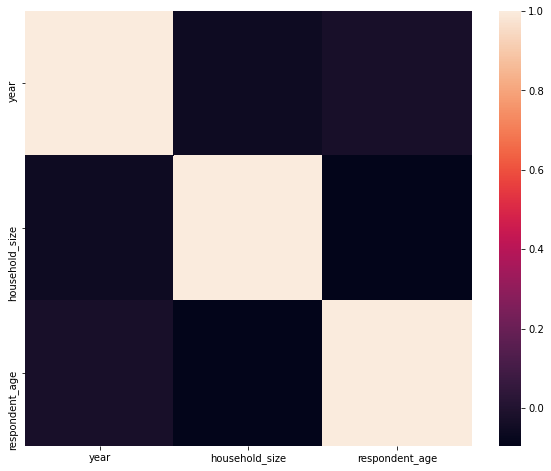

In [1246]:
f,ax = plt.subplots(figsize=(10, 8))
corr = fill_null.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# 7. Exporting the Clean Dataset

In [1247]:
# Let's now save our clean dataset in a safe place
fill_null.to_csv('new_financial_dataset.csv')


In [1248]:
fill_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23058 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     23058 non-null  object 
 1   year                        23058 non-null  int64  
 2   uniqueid                    23058 non-null  object 
 3   has_a_bank_account          23058 non-null  object 
 4   type_of_location            23058 non-null  object 
 5   cell_phone_access           23058 non-null  object 
 6   household_size              23058 non-null  float64
 7   respondent_age              23058 non-null  float64
 8   gender_of_respondent        23058 non-null  object 
 9   the_relationship_with_head  23058 non-null  object 
 10  marital_status              23058 non-null  object 
 11  level_of_education          23058 non-null  object 
 12  type_of_job                 23058 non-null  object 
dtypes: float64(2), int64(1), object

# Univariate Analysis with Python


## 1.2 Categorical Variables


### 1.21 Frequency Tables

In [1249]:
# Creating Frequency table of column using the value_counts() function
#
# Creating Frequency table of 'has_a_bank_account' column
fill_null.has_a_bank_account.value_counts()


No     19778
Yes     3280
Name: has_a_bank_account, dtype: int64

#### 1.211 With Bank Account


In [1250]:
# Let's now analyse those that Have a Bank Account
with_account = fill_null['has_a_bank_account'] == 'Yes'
df_with_account = fill_null[with_account]
df_with_account

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,uniqueid_12,Yes,Rural,Yes,3.0,69.0,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,uniqueid_18,Yes,Rural,Yes,6.0,27.0,Female,Head of Household,Married/Living together,Secondary education,Self employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23327,Uganda,2018,uniqueid_1905,Yes,Urban,Yes,1.0,24.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23331,Uganda,2018,uniqueid_1909,Yes,Rural,Yes,3.0,26.0,Female,Head of Household,Married/Living together,Secondary education,Other Income
23351,Uganda,2018,uniqueid_1929,Yes,Rural,Yes,5.0,36.0,Female,Head of Household,Widowed,Primary education,No Income
23358,Uganda,2018,uniqueid_1936,Yes,Rural,Yes,10.0,50.0,Female,Head of Household,Widowed,Primary education,Self employed


In [1251]:
# Creating Frequency table of 'type_of_location' for those with bank account
df_with_account.type_of_location.value_counts()

Urban    1641
Rural    1639
Name: type_of_location, dtype: int64

In [1252]:
# Creating Frequency table of 'cell_phone_access' for those with bank account
df_with_account.cell_phone_access.value_counts()

Yes    3187
No       93
Name: cell_phone_access, dtype: int64

In [1253]:
# Creating Frequency table of 'gender_of_respondent' for those with bank account
df_with_account.gender_of_respondent.value_counts()

Male      1808
Female    1472
Name: gender_of_respondent, dtype: int64

In [1254]:
# Creating Frequency table of ' the_relationship_with_head' for those with bank account
df_with_account.the_relationship_with_head.value_counts()

Head of Household      2234
Spouse                  700
Child                   192
Parent                   67
Other relative           66
Other non-relatives      21
Name: the_relationship_with_head, dtype: int64

In [1255]:
# Creating Frequency table of 'marital_status' for those with bank account
df_with_account.marital_status.value_counts()

Married/Living together    1848
Single/Never Married        970
Divorced/Seperated          235
Widowed                     225
Dont know                     2
Name: marital_status, dtype: int64

In [1256]:
# Creating Frequency table of ' level_of_education' for those with bank account
df_with_account.level_of_education.value_counts()


Primary education                  1083
Secondary education                 979
Tertiary education                  590
Vocational/Specialised training     458
No formal education                 159
Other/Dont know/RTA                   6
6                                     5
Name: level_of_education, dtype: int64

In [1257]:
# Creating Frequency table of 'type_of_job' for those with bank account
df_with_account.type_of_job.value_counts()

Self employed                   851
Farming and Fishing             618
Formally employed Private       571
Informally employed             445
Formally employed Government    300
Remittance Dependent            232
Other Income                    192
Government Dependent             41
No Income                        16
Dont Know/Refuse to answer       14
Name: type_of_job, dtype: int64

### 1.22 Bar Charts 

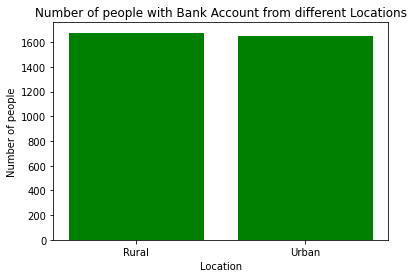

In [1258]:
# Bar charts are used to display values associated with categorical data.
#
# 1. type_of_location

# Defining our data
x = ['Rural', 'Urban']
people = [1677,1648]
 
plt.bar(x, people, color='green')

# Labelling our x axis
plt.xlabel("Location")

# Labelling our y axis
plt.ylabel("Number of people")

# Giving a title to our Bar chart
plt.title("Number of people with Bank Account from different Locations")

# Displaying our chart
plt.show()

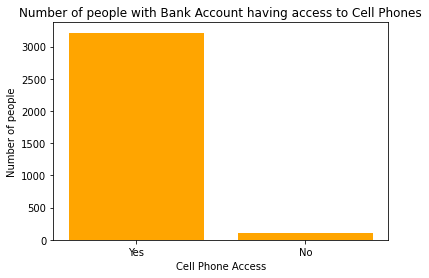

In [1259]:
# 2. cell_phone_access

# Defining our data
x = ['Yes', 'No']
people = [3214,111]
 
plt.bar(x, people, color='Orange')

# Labelling our x axis
plt.xlabel("Cell Phone Access")

# Labelling our y axis
plt.ylabel("Number of people")

# Giving a title to our Bar chart
plt.title("Number of people with Bank Account having access to Cell Phones")

# Displaying our chart
plt.show()

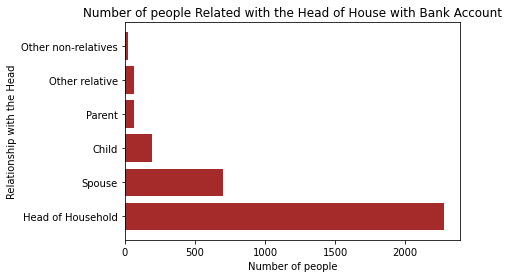

In [1260]:
# 3. Relationship with Head

# Defining our data
x = ['Head of Household', 'Spouse', 'Child', 'Parent', 'Other relative', 'Other non-relatives']
people = [2277,701,193,67,66,21]
 
plt.barh(x, people, color='Brown')

# Labelling our x axis
plt.xlabel("Number of people")

# Labelling our y axis
plt.ylabel("Relationship with the Head")

# Giving a title to our Bar chart
plt.title("Number of people Related with the Head of House with Bank Account")

# Displaying our chart
plt.show()

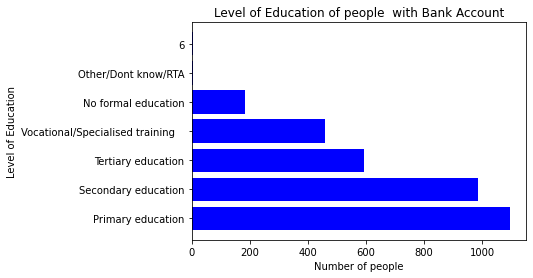

In [1261]:
# 4.Level of Education

# Defining our data
x = ['Primary education', 'Secondary education', 'Tertiary education', 'Vocational/Specialised training   ', 'No formal education', 'Other/Dont know/RTA', '6']
people = [1097,984,592,458,183,6,5]

plt.barh(x, people, color='blue')

# Labelling our x axis
plt.xlabel("Number of people")

# Labelling our y axis
plt.ylabel("Level of Education")

# Giving a title to our Bar chart
plt.title("Level of Education of people  with Bank Account")

# Displaying our chart
plt.show()

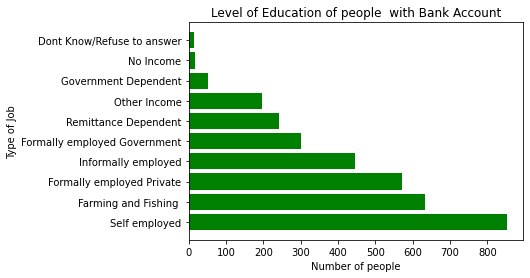

In [1262]:
# 5.Type of Job

# Defining our data
x = ['Self employed', 'Farming and Fishing ', 'Formally employed Private', 'Informally employed', 'Formally employed Government', 'Remittance Dependent', 'Other Income', 'Government Dependent', 'No Income', 'Dont Know/Refuse to answer']
people = [854,634,572,446,300,241,196,52,16,14]

plt.barh(x, people, color='green')

# Labelling our x axis
plt.xlabel("Number of people")

# Labelling our y axis
plt.ylabel("Type of Job")

# Giving a title to our Bar chart
plt.title("Level of Education of people  with Bank Account")

# Displaying our chart
plt.show()

### 1.23 Pie Charts

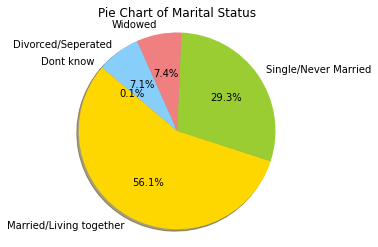

In [1263]:
# 6. Marital Status
# Create a pie chart
#

# Defining our labels, sizes, colors and explode (this will explode the 1st slice)
labels = 'Married/Living together', 'Single/Never Married', 'Widowed', 'Divorced/Seperated', 'Dont know'
sizes  = [1866, 974, 246, 237, 2]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']


# Plotting our pie chart
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie Chart of Marital Status')
plt.show()

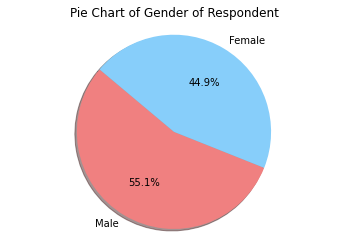

In [1264]:
# 6. Gender of Respondent
# Create a pie chart
#

# Defining our labels, sizes, colors and explode (this will explode the 1st slice)
labels = 'Male', 'Female'
sizes  = [1831,1494]
colors = ['lightcoral', 'lightskyblue']


# Plotting our pie chart
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie Chart of Gender of Respondent')
plt.show()

## 1.3 Numerical Variables

### 1.31 Measures of Central Tendency

In [1265]:
# 1. Mean
# Finding the mean of the household_size 
df_with_account["household_size"].mean()

3.563109756097561

In [1266]:
# Finding the mean of the respondent_age 
df_with_account["respondent_age"].mean()

38.97530487804878

In [1267]:
# 2. Median
# Finding the median of household_size
df_with_account["household_size"].median()

3.0

In [1268]:
# Finding the median of respondent_age
df_with_account["respondent_age"].median()

36.0

In [1269]:
# 3. Mode
# Finding the mode of household_size
df_with_account["household_size"].mode()

0    1.0
dtype: float64

In [1270]:
# Finding the mode of respondent_age
df_with_account["respondent_age"].mode()

0    30.0
dtype: float64

### 1.32 Measures of Dispersion/Variability/Spread

In [1271]:
# 1. Standard Deviation
# Finding the standard deviation of household_size
df_with_account["household_size"].std()

2.2196367992836823

In [1272]:
# Finding the standard deviation of respondent_age
df_with_account["respondent_age"].std()

13.485661567589487

In [1273]:
# 2. Variance
# Finding the variance of the household_size
df_with_account["household_size"].var()

4.92678752073431

In [1274]:
# Finding the variance of the respondent_age
df_with_account["respondent_age"].var()

181.86306791556012

In [1275]:
# 3. Range
# Finding the min and max values of the household_size
household_size_max = df_with_account["household_size"].max()
household_size_min = df_with_account["household_size"].min()

# Calculating the range of the household_size
household_size_max - household_size_min

17.0

In [1276]:
# Finding the min and max values of the respondent_age
respondent_age_max = df_with_account["respondent_age"].max()
respondent_age_min = df_with_account["respondent_age"].min()

# Calculating the range of the respondent_age
respondent_age_max - respondent_age_min

63.0

In [1277]:
# 4. Quantiles

# Finding the quantiles of the household_size
df_with_account["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [1278]:
# Finding the quantiles of the respondent_age
df_with_account["respondent_age"].quantile([0.25,0.5,0.75])

0.25    29.0
0.50    36.0
0.75    47.0
Name: respondent_age, dtype: float64

In [1279]:
# 5. Skewness
# Determining the skewness of household_size
df_with_account["household_size"].skew()

0.9619964706097001

In [1280]:
# Determining the skewness of respondent_age
df_with_account["respondent_age"].skew()

0.7886370753621463

In [1281]:
# 6. Kurtosis

# Determining the kurtosis of household_size
df_with_account["household_size"].kurt()

1.2297181107126698

In [1282]:
# Determining the kurtosis of respondent_age
df_with_account["respondent_age"].kurt()

-0.007077065590185505

In [1283]:
# Summary Statistics

# Displaying the summary statistics of the household_size
#
df_with_account['household_size'].describe()

count    3280.000000
mean        3.563110
std         2.219637
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: household_size, dtype: float64

In [1284]:
# Displaying the summary statistics of the respondent_age
#
df_with_account['respondent_age'].describe()

count    3280.000000
mean       38.975305
std        13.485662
min        16.000000
25%        29.000000
50%        36.000000
75%        47.000000
max        79.000000
Name: respondent_age, dtype: float64

### 1.33 Visualisation Techniques

#### Box Plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


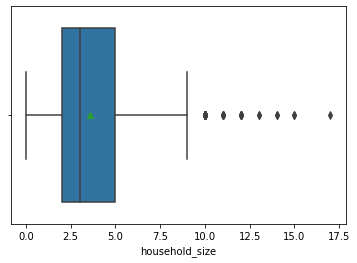

In [1285]:
# Creating the boxplot the household_size
#
sns.boxplot(df_with_account["household_size"], showmeans=True)

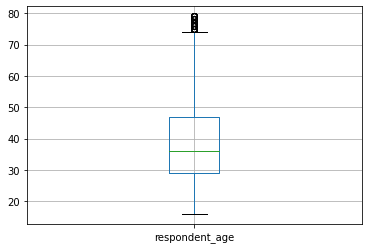

In [1286]:
# Creating the boxplot for respondent_age
#
df_with_account.boxplot(["respondent_age"])

#### Histograms

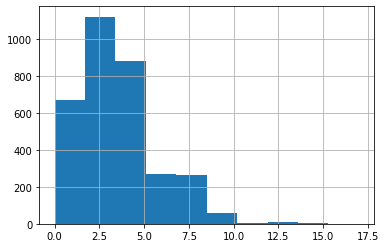

In [1287]:
# Plotting the histogram for household_size
#
df_with_account['household_size'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


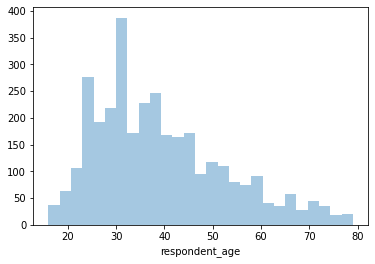

In [1288]:
# Plotting the histogram for respondent_age
#
#df_with_account['respondent_age'].hist()
sns.distplot(df_with_account['respondent_age'], kde=False, label='Respondent Age')

# Bivariate Analysis

## 1.0 Numerical and Numerical

### 1.01 Scatter Plots

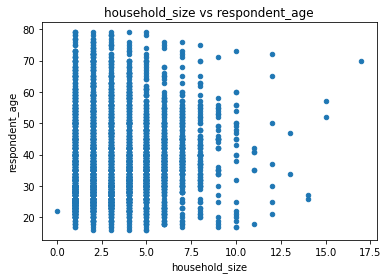

In [1289]:
# Using Pandas: Plotting our scatterplot to compare the variables
df_with_account.plot(x = 'household_size', y = 'respondent_age', kind='scatter')

# Giving our scatterplot a title
plt.title('household_size vs respondent_age')

# Labelling our x axis
plt.xlabel('household_size')

# Labelling our y axis
plt.ylabel('respondent_age')

# We then display our scatterplot as shown below
# m, b = np.polyfit(x = 'household_size', y = 'respondent_age', 1)
# plt.plot(x, m*x + b)
plt.show()


# The scatterplot graph shows that the variable diameter at breast is strongly correlated to the clearfell stampage fees.
# This is because as the variable diameter increases the

### 1.02 Correlation

In [1290]:
# Determine the relationship between the household_size and respondent_age 
# by determining the correlation coeffient.
# Calculating the pearson coefficient
pearson_coeff = df_with_account["household_size"].corr(df_with_account["respondent_age"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df_with_account["household_size"].corr(df_with_account["respondent_age"]) 
print(coeff)
# Since the correlation coefficent of household_size and respondent_age is 0.042, 
# this means that household_size and respondent_age are weakly correlated.

0.04234907083048931
0.04234907083048931


### 1.1 Categorical and Categorical

#### 1.11 Stacked Column Chart

In [1291]:
def location(item):
  country = df_with_account['country'] == item
  if item:
 # type of location   
    #return df_with_account[country].type_of_location.value_counts()
# cell phone access
    return df_with_account[country].cell_phone_access.value_counts()
# gender of respondent
    #return df_with_account[country].gender_of_respondent.value_counts()
# relationship with head
    #return df_with_account[country].the_relationship_with_head.value_counts()
# marital status
    #return df_with_account[country].marital_status.value_counts()
# level of education
    #return df_with_account[country].level_of_education.value_counts()
# type of job
    #return df_with_account[country].type_of_job.value_counts()



In [1292]:
location('Kenya')

Yes    1443
No       47
Name: cell_phone_access, dtype: int64

In [1293]:
location('Rwanda')

Yes    977
No      16
Name: cell_phone_access, dtype: int64

In [1294]:
location('Tanzania')

Yes    596
No      20
Name: cell_phone_access, dtype: int64

In [1295]:
location('Uganda')

Yes    171
No      10
Name: cell_phone_access, dtype: int64

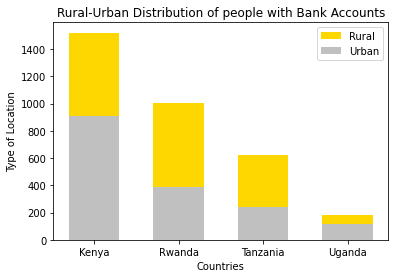

In [1296]:
# In this example, we will first create a stacked column chart from an array and numpy arrays 
# 
countries = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
Urban   = np.array([907,385,239,117])
Rural   = np.array([614,618,381,64])


X = [country for country in countries]

# We stack the silver medal bars on top of the bronze medals bars and similarly gold medal bar on top
# by passing the parameter bottom in the plt.bar () as shown below
# 
plt.bar(X, Rural, width=0.6, label='Rural', color='gold', bottom=Urban)
plt.bar(X, Urban, width=0.6, label='Urban', color='silver')


# labeling our y axis
plt.ylabel("Type of Location")

# Labeling our x axis
plt.xlabel("Countries")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Rural-Urban Distribution of people with Bank Accounts")

# Displaying our chart
plt.show()

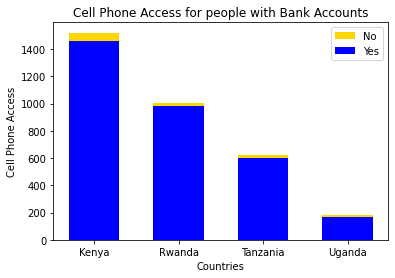

In [1297]:
# In this example, we will first create a stacked column chart from an array and numpy arrays 
# 
countries = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
Yes   = np.array([1459,984,600,171])
No   = np.array([62,19,20,10])


X = [country for country in countries]

# We stack the silver medal bars on top of the bronze medals bars and similarly gold medal bar on top
# by passing the parameter bottom in the plt.bar () as shown below
# 
plt.bar(X, No, width=0.6, label='No', color='gold', bottom=Yes)
plt.bar(X, Yes, width=0.6, label='Yes', color='blue')


# labeling our y axis
plt.ylabel("Cell Phone Access")

# Labeling our x axis
plt.xlabel("Countries")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Cell Phone Access for people with Bank Accounts")

# Displaying our chart
plt.show()

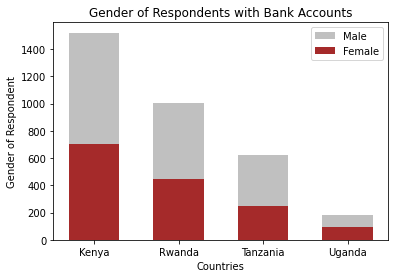

In [1298]:
# In this example, we will first create a stacked column chart from an array and numpy arrays 
# 
countries = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
Male  = np.array([820,557,370,84])
Female   = np.array([701,446,250,97])


X = [country for country in countries]

# We stack the silver medal bars on top of the bronze medals bars and similarly gold medal bar on top
# by passing the parameter bottom in the plt.bar () as shown below
# 
plt.bar(X, Male, width=0.6, label='Male', color='silver', bottom=Female)
plt.bar(X, Female, width=0.6, label='Female', color='Brown')


# labeling our y axis
plt.ylabel("Gender of Respondent")

# Labeling our x axis
plt.xlabel("Countries")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Gender of Respondents with Bank Accounts")

# Displaying our chart
plt.show()

Text(0.5, 1.0, 'Relationship with the Household of people with Bank Accounts')

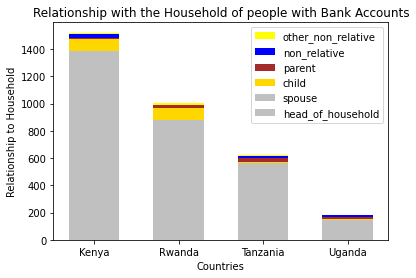

In [1299]:
# In this example, we will first create a stacked column chart from an array and numpy arrays 
# 
countries = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
head_of_household   = np.array([1083,611,474,109])
spouse   = np.array([304,268,90,39])
child = np.array([90,89,11,3])
parent = np.array([4,20,25,18])
other_relative = np.array([34,5,15,12])
other_non_relative = np.array([6,10,5,0])

X = [country for country in countries]

# We stack the silver medal bars on top of the bronze medals bars and similarly gold medal bar on top
# by passing the parameter bottom in the plt.bar () as shown below
# 
plt.bar(X, other_non_relative, width=0.6, label='other_non_relative', color='yellow', bottom=other_relative+parent+child+spouse+head_of_household)
plt.bar(X, other_relative, width=0.6, label='non_relative', color='blue', bottom=parent+child+spouse+head_of_household)
plt.bar(X, parent, width=0.6, label='parent', color='brown', bottom=child+spouse+head_of_household)
plt.bar(X, child, width=0.6, label='child', color='gold', bottom=spouse+head_of_household)
plt.bar(X, spouse, width=0.6, label='spouse', color='silver', bottom=head_of_household)
plt.bar(X, head_of_household, width=0.6, label='head_of_household', color='silver')


# labeling our y axis
plt.ylabel("Relationship to Household")

# Labeling our x axis
plt.xlabel("Countries")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Relationship with the Household of people with Bank Accounts")

# Displaying our chartlt.show()

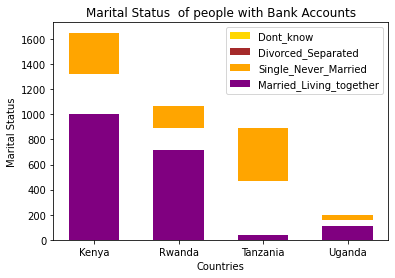

In [1300]:
# In this example, we will first create a stacked column chart from an array and numpy arrays 
# 
countries = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
Married_Living_together   = np.array([999,713,41,113])
Single_Never_Married   = np.array([326,178,426,44])
Widowed = np.array([132,75,30,9])
Divorced_Separated = np.array([62,37,123,15])
Dont_know = np.array([2,0,0,0])


X = [country for country in countries]

# We stack the silver medal bars on top of the bronze medals bars and similarly gold medal bar on top
# by passing the parameter bottom in the plt.bar () as shown below
# 
plt.bar(X, Dont_know, width=0.6, label='Dont_know', color='gold', bottom=Divorced_Separated+Widowed+Single_Never_Married+Married_Living_together)
plt.bar(X, Divorced_Separated, width=0.6, label='Divorced_Separated', color='brown',bottom=Widowed+Single_Never_Married+Married_Living_together)
plt.bar(X, Single_Never_Married, width=0.6, label='Single_Never_Married', color='orange',bottom=Single_Never_Married+Married_Living_together)
plt.bar(X, Married_Living_together, width=0.6, label='Married_Living_together', color='purple')

# labeling our y axis
plt.ylabel("Marital Status")

# Labeling our x axis
plt.xlabel("Countries")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Marital Status  of people with Bank Accounts")

# Displaying our chart
plt.show()

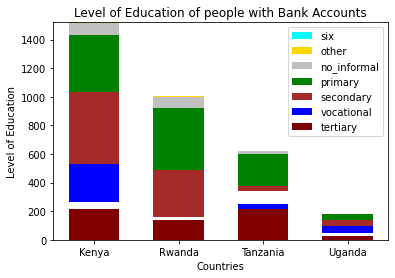

In [1301]:
# In this example, we will first create a stacked column chart from an array and numpy arrays 
# 
countries = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']

tertiary   = np.array([218,136,213,25])
vocational  = np.array([265,21,125,47])
secondary  = np.array([548,331,38,67])
primary  = np.array([403,433,223,38])
no_informal  = np.array([81,78,20,4])
other  = np.array([6,4,1,0])
six = np.array([0,4,1,0])

X = [country for country in countries]

# We stack the silver medal bars on top of the bronze medals bars and similarly gold medal bar on top
# by passing the parameter bottom in the plt.bar () as shown below
# 
plt.bar(X, six, width=0.6, label='six', color='cyan', bottom=other+no_informal+primary+secondary+vocational+tertiary)
plt.bar(X, other, width=0.6, label='other', color='gold', bottom=no_informal+primary+secondary+vocational+tertiary)
plt.bar(X, no_informal, width=0.6, label='no_informal', color='silver', bottom=primary+secondary+vocational+tertiary)
plt.bar(X, primary, width=0.6, label='primary', color='green', bottom=secondary+vocational+tertiary)
plt.bar(X, secondary, width=0.6, label='secondary', color='brown', bottom=vocational+tertiary)
plt.bar(X, vocational, width=0.6, label='vocational', color='blue', bottom=vocational)
plt.bar(X, tertiary, width=0.6, label='tertiary', color='maroon')


# labeling our y axis
plt.ylabel("Level of Education")

# Labeling our x axis
plt.xlabel("Countries")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Level of Education of people with Bank Accounts")

# Displaying our chart
plt.show()

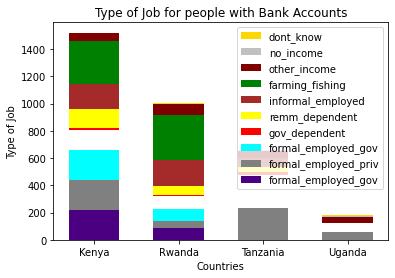

In [1302]:
# In this example, we will first create a stacked column chart from an array and numpy arrays 
# 
countries = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
formal_employed_gov   = np.array([216,84,0,0])
formal_employed_priv   = np.array([225,56,237,54])
self_employed   = np.array([364,182,240,68])
gov_dependent   = np.array([19,7,23,3])
remm_dependent   = np.array([137,69,35,0])
informal_employed   = np.array([186,191,69,0])
farming_fishing   = np.array([310,324,0,0])
other_income   = np.array([63,82,46,46])
no_income  = np.array([0,0,11,5])
dont_know  = np.array([1,8,0,5])


X = [country for country in countries]

# We stack the silver medal bars on top of the bronze medals bars and similarly gold medal bar on top
# by passing the parameter bottom in the plt.bar () as shown below
# 
plt.bar(X, dont_know, width=0.6, label='dont_know', color='gold', bottom=no_income+other_income+farming_fishing+informal_employed+remm_dependent+gov_dependent+self_employed+formal_employed_priv+formal_employed_gov)
plt.bar(X, no_income, width=0.6, label='no_income', color='silver', bottom=other_income+farming_fishing+informal_employed+remm_dependent+gov_dependent+self_employed+formal_employed_priv+formal_employed_gov)
plt.bar(X, other_income, width=0.6, label='other_income', color='maroon', bottom=farming_fishing+informal_employed+remm_dependent+gov_dependent+self_employed+formal_employed_priv+formal_employed_gov)
plt.bar(X, farming_fishing, width=0.6, label='farming_fishing', color='green', bottom=informal_employed+remm_dependent+gov_dependent+self_employed+formal_employed_priv+formal_employed_gov)
plt.bar(X, informal_employed, width=0.6, label='informal_employed', color='brown', bottom=remm_dependent+gov_dependent+self_employed+formal_employed_priv+formal_employed_gov)
plt.bar(X, remm_dependent, width=0.6, label='remm_dependent', color='yellow', bottom=gov_dependent+self_employed+formal_employed_priv+formal_employed_gov)
plt.bar(X, gov_dependent, width=0.6, label='gov_dependent', color='red', bottom=self_employed+formal_employed_priv+formal_employed_gov)
plt.bar(X, formal_employed_gov, width=0.6, label='formal_employed_gov', color='cyan', bottom=formal_employed_priv+formal_employed_gov)
plt.bar(X, formal_employed_priv, width=0.6, label='formal_employed_priv', color='gray', bottom=formal_employed_gov)
plt.bar(X, formal_employed_gov, width=0.6, label='formal_employed_gov', color='indigo')

# labeling our y axis
plt.ylabel("Type of Job")

# Labeling our x axis
plt.xlabel("Countries")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Type of Job for people with Bank Accounts")

# Displaying our chart
plt.show()

### 1.2 Categorical and Numerical

### 1.21 Line Charts

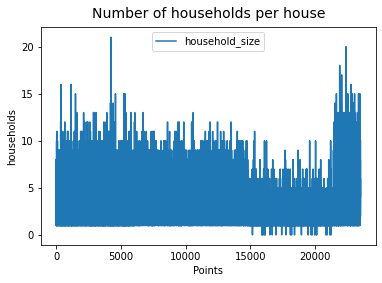

In [1303]:
# Plotting a graph of household_size 
# ---
#


# Drawing our line graph
fill_null[["household_size"]].plot()
# Giving a title to our line graph
plt.title("Number of households per house", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('households')

# Labelling the x-axis
plt.xlabel('Points')

# Displaying our graph
plt.show()

### 1.22 Z-Score

In [1304]:
# Calculating the z - score for household_size
# ---
#
from scipy import stats

a=fill_null['household_size']
stats.zscore(a)

array([-0.30927335,  0.56652953,  0.56652953, ...,  0.56652953,
        1.44233241,  2.75603672])

In [1305]:
# Calculating the z - score for respondent_age
# ---
#
from scipy import stats

a = fill_null['respondent_age']
stats.zscore(a)

array([-0.90656508,  2.09974279, -0.77585604, ..., -0.71050152,
       -0.51443796, -1.16798315])

# Multivariate Analysis

In [1306]:
# Converting Categorical Variables to Numeric Variables

# 1. converting 'gender_of_respondent' column from 'Male' 'Female' to '1' '2'
gender = {'Male':1, 'Female':2}
fill_null['gender_of_respondent']=fill_null['gender_of_respondent'].map(gender)



In [1307]:
# 2. converting 'type_of_location' column to numerical data
r_location  = {'Urban':1, 'Rural':2}
fill_null['type_of_location']=fill_null['type_of_location'].map(r_location)

In [1308]:
# 3. converting 'cell_phone_access' column to numerical data
cellphone = {'Yes':1, 'No':2}
fill_null['cell_phone_access']=fill_null['cell_phone_access'].map(cellphone)

In [1309]:
# 4. converting 'the_relationship_with_head' column to numerical data
relationship = {'Head of Household':1, 'Spouse':2, 'Child':3, 'Parent':4, 'Other relative': 5, 'Other non-relative':6}
fill_null['the_relationship_with_head']=fill_null['the_relationship_with_head'].map(relationship)

In [1310]:
# 5. converting 'marital_status' column to numerical data
status = {'Married/Living together':1, 'Single/Never Married':2, 'Widowed':3, 'Divorced/Separated':4, 'Dont know':5}
fill_null['marital_status']=fill_null['marital_status'].map(status)


In [1311]:
# 6. converting 'level_of_education' column to numerical data
education = {'Tertiary edication':1, 'Vocational/Specialised training':2, 'Secondary education':3, 'Primary education':4, 'No formal education':5, 'Other/Dont Know/RTA':6}
fill_null['level_of_education']=fill_null['level_of_education'].map(education)


In [1312]:
# 7. converting 'type_of_job' column to numerical data
job = {'Formally employed Government':1, 'Formally employed Private':2, 'Self employed':3, 'Govenrment Dependent':4, 'Remmitance Dependent':5, 'Informally employed':6, 'Farming and Fishing':7, 'Other Income':8, 'No Income':9, 'Dont know/Refuse to Answer':10}
fill_null['type_of_job']=fill_null['type_of_job'].map(job)

In [1313]:
# 8. converting 'country' column to numerical data
country = {'Kenya':1, 'Rwanda':2, 'Tanzania':3, 'Uganda':4}
fill_null['country']=fill_null['country'].map(country)

In [1314]:
# 9. converting 'has_a_bank_account' column to numerical data
account = {'Yes':1, 'No':2}
fill_null['has_a_bank_account']=fill_null['has_a_bank_account'].map(account)

In [1315]:
# Previewing our new dataset
fill_null

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,1,2018,uniqueid_1,1,2,1,3.0,24.0,2,2.0,1.0,3.0,3.0
1,1,2018,uniqueid_2,2,2,2,5.0,70.0,2,1.0,3.0,5.0,NaN
2,1,2018,uniqueid_3,1,1,1,5.0,26.0,1,5.0,2.0,2.0,3.0
3,1,2018,uniqueid_4,2,2,1,5.0,34.0,2,1.0,1.0,4.0,2.0
4,1,2018,uniqueid_5,2,1,2,8.0,26.0,1,3.0,2.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,4,2018,uniqueid_2113,2,2,1,4.0,48.0,2,1.0,NaN,5.0,8.0
23520,4,2018,uniqueid_2114,2,2,1,2.0,27.0,2,1.0,2.0,3.0,8.0
23521,4,2018,uniqueid_2115,2,2,1,5.0,27.0,2,4.0,3.0,4.0,8.0
23522,4,2018,uniqueid_2116,2,1,1,7.0,30.0,2,4.0,NaN,3.0,3.0


In [1316]:
fill_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23058 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     23058 non-null  int64  
 1   year                        23058 non-null  int64  
 2   uniqueid                    23058 non-null  object 
 3   has_a_bank_account          23058 non-null  int64  
 4   type_of_location            23058 non-null  int64  
 5   cell_phone_access           23058 non-null  int64  
 6   household_size              23058 non-null  float64
 7   respondent_age              23058 non-null  float64
 8   gender_of_respondent        23058 non-null  int64  
 9   the_relationship_with_head  22868 non-null  float64
 10  marital_status              20986 non-null  float64
 11  level_of_education          21876 non-null  float64
 12  type_of_job                 20351 non-null  float64
dtypes: float64(6), int64(6), object

In [1317]:
# removing null values
columns= fill_null.columns.to_list()
def na_values(df, columns):
    df = df.dropna(subset=columns, inplace=True)
    return df
na_values(fill_null,columns)

In [1318]:
# converting datatypes to integers
fill_null['respondent_age'] = fill_null['respondent_age'].astype(int)
fill_null['marital_status'] = fill_null['marital_status'].astype(int)
fill_null['the_relationship_with_head'] = fill_null['the_relationship_with_head'].astype(int)
fill_null['level_of_education'] = fill_null['level_of_education'].astype(int)
fill_null['type_of_job'] = fill_null['type_of_job'].astype(int)
fill_null['household_size'] = fill_null['household_size'].astype(int)

In [1319]:
fill_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17589 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   country                     17589 non-null  int64 
 1   year                        17589 non-null  int64 
 2   uniqueid                    17589 non-null  object
 3   has_a_bank_account          17589 non-null  int64 
 4   type_of_location            17589 non-null  int64 
 5   cell_phone_access           17589 non-null  int64 
 6   household_size              17589 non-null  int64 
 7   respondent_age              17589 non-null  int64 
 8   gender_of_respondent        17589 non-null  int64 
 9   the_relationship_with_head  17589 non-null  int64 
 10  marital_status              17589 non-null  int64 
 11  level_of_education          17589 non-null  int64 
 12  type_of_job                 17589 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.9+ MB


### 1.1 Principal Component Analysis

In [1320]:
# 1. Preprocessing
# 1. divide the dataset into a feature set and corresponding labels. 
# The following script performs this task.
# The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 

X = fill_null.drop(['year', 'uniqueid'], 1)
y = fill_null['has_a_bank_account']
X

,country,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,1,1,2,1,3,24,2,2,1,3,3
2,1,1,1,1,5,26,1,5,2,2,3
3,1,2,2,1,5,34,2,1,1,4,2
4,1,2,1,2,8,26,1,3,2,4,6
5,1,2,2,2,7,26,2,2,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...
23517,4,2,1,1,2,16,1,4,2,4,8
23518,4,2,2,1,2,20,2,3,2,4,9
23520,4,2,2,1,2,27,2,1,2,3,8
23521,4,2,2,1,5,27,2,4,3,4,8


In [1321]:
# 2. Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1322]:
# 3. Normalization
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1323]:
# 4. Applying PCA
 
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and test sets.
# 
# import PCA from Python's Scikit-Learn library

from sklearn.decomposition import PCA
#Initialize the PCA class 
pca = PCA()
# Call the fit and then transform methods by passing the feature set to these methods.
# The transform method returns the specified number of principal components.
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [1324]:
# 5. Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 18.702% variance. 
# Similarly, the second principal component causes 14.43% variance in the dataset.
# Similarly, the third principal component causes 9.68% variance in the dataset.
# Similarly, the fourth principal component causes 7.50% variance in the dataset.
# Similarly, the fifth principal component causes 7.00% variance in the dataset.
# Similarly, the sixth principal component causes 6.46% variance in the dataset.
# Similarly, the seventh principal component causes 5.84% variance in the dataset.
# Similarly, the eighth principal component causes 5.26% variance in the dataset.
# Similarly, the nineth principal component causes 5.21% variance in the dataset.
# Similarly, the tenth principal component causes 3.91% variance in the dataset.
# Collectively we can say that (18.70+15.96+14.43+9.68+7.50+7.00+6.46+5.84+5.26+5.21+3.91) 99.95% percent of the classification information contained 
# in the feature set is captured by the first two principal components.
explained_variance

array([0.18704177, 0.15961661, 0.1443358 , 0.09683433, 0.07508267,
       0.07002608, 0.06469812, 0.05847207, 0.05261656, 0.05210933,
       0.03916665])

In [1325]:
# 6. Using 1 Principal Component
# Let's use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [1326]:
# 7. Training and Making Predictions
# using random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [1327]:
# 8. Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 28 out of 30 instances, 
# resulting in 87.35% accuracy.

[[   0  445]
 [   0 3073]]
Accuracy 0.873507674815236


In [1328]:
# 9. Results with 2 Principal Components
# Lets now write code to evaluate clasification performance of the 
# random forest algorithm with 2 principal components.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With two principal components the classification accuracy increase to 93.91%
classifier = RandomForestClassifier(max_depth=1, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [1329]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[ 258  187]
 [  43 3030]]
Accuracy 0.9346219442865265


In [1330]:
# 9. Results with 11 Principal Components
# Lets now write code to evaluate clasification performance of the 
# random forest algorithm with 11 principal components.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=11)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With two principal components the classification accuracy again increase to 94.00%
classifier = RandomForestClassifier(max_depth=10, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [1331]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))
# With all the 11 principal components the classification accuracy becomes 100%

[[ 445    0]
 [   0 3073]]
Accuracy 1.0


### 1.2 Factor Analysis

In [1332]:
# dropping year and uniqueid columns, they are unnecessary
fill_null.drop(['year', 'uniqueid'],axis=1,inplace=True)

In [1333]:
# previewing our dataset information
fill_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17589 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   country                     17589 non-null  int64
 1   has_a_bank_account          17589 non-null  int64
 2   type_of_location            17589 non-null  int64
 3   cell_phone_access           17589 non-null  int64
 4   household_size              17589 non-null  int64
 5   respondent_age              17589 non-null  int64
 6   gender_of_respondent        17589 non-null  int64
 7   the_relationship_with_head  17589 non-null  int64
 8   marital_status              17589 non-null  int64
 9   level_of_education          17589 non-null  int64
 10  type_of_job                 17589 non-null  int64
dtypes: int64(11)
memory usage: 1.6 MB


In [1334]:
# 1. Adequacy Test
# Before we perform factor analysis,we need to evaluate the “factorability” of our dataset. 
# Factorability means "can we found the factors in the dataset?". 
# There are two methods to check the factorability or sampling adequacy:
# - Bartlett’s Test
# - Kaiser-Meyer-Olkin Test
# ---
# We will use Bartlett’s test of sphericity to check whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, 
# we should not employ a factor analysis.
# ---

# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(fill_null)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(24178.364393246855, 0.0)

In [1335]:
# 2. Choosing the Number of Factors
# For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.
# 
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(fill_null, 11, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Here, we can see only for 4-factors eigenvalues are greater than one. 
# It means we need to choose only 4 factors (or unobserved variables).

,Original_Eigenvalues
0,2.062356
1,1.765827
2,1.589468
3,1.052437
4,0.826636
5,0.768506
6,0.705882
7,0.643958
8,0.581069
9,0.569773


In [1336]:
# 3. Performing Factor Analysis
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(fill_null, 4, rotation="varimax")
fa.loadings

# We will note that
# Factor 1 has high factor loadings for type_of_location,household_size and type_of_job 
# Factor 2 has high factor loadings for has_a_bank_account,cell_phone_access, and level_of_education 
# Factor 3 has high factor loadings for respondent_age,the_relationship_with_head and level_of_education 
# Factor 4 has none of the high loagings for any variable and is not easily interpretable. Its good if we take only three factors.


,Factor1,Factor2,Factor3,Factor4
country,-0.372644,0.383876,0.091961,0.008342
has_a_bank_account,0.108849,0.534778,0.075624,0.031915
type_of_location,0.599826,0.035443,-0.001304,-0.168564
cell_phone_access,-0.110141,0.405475,-0.011427,0.163257
household_size,0.420383,-0.033046,0.211572,-0.372384
respondent_age,0.085547,0.095926,-0.527207,0.201120
gender_of_respondent,0.084190,0.186701,0.239452,0.268846
the_relationship_with_head,0.137003,0.047591,0.868712,0.125006
marital_status,-0.183953,0.152352,-0.061760,0.605371
level_of_education,0.188494,0.578433,-0.254503,0.116795


In [1337]:
# 4. Performing factor analysis for 3 factors

# Create factor analysis object and perform factor analysis using 3 factors
fa = FactorAnalyzer()
fa.analyze(fill_null, 3, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3
country,-0.315175,0.276979,0.072449
has_a_bank_account,0.095363,0.497324,0.036283
type_of_location,0.643722,0.044767,-0.030925
cell_phone_access,-0.162696,0.423719,-0.032958
household_size,0.533671,-0.112549,0.196950
respondent_age,-0.014985,0.144652,-0.531021
gender_of_respondent,-0.011209,0.308386,0.220696
the_relationship_with_head,0.113424,0.172157,0.836642
marital_status,-0.348723,0.315106,-0.065764
level_of_education,0.129821,0.585947,-0.303828


In [1338]:
# 5. Getting variance of each factors
# 
fa.get_factor_variance()

# Noting total 32% cumulative Variance explained by the 3 factors.

,Factor1,Factor2,Factor3
SS Loadings,1.261439,1.134600,1.174718
Proportion Var,0.114676,0.103145,0.106793
Cumulative Var,0.114676,0.217822,0.324614


### 1.3 Discriminant Analysis

In [1339]:
# check dataset information
fill_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17589 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   country                     17589 non-null  int64
 1   has_a_bank_account          17589 non-null  int64
 2   type_of_location            17589 non-null  int64
 3   cell_phone_access           17589 non-null  int64
 4   household_size              17589 non-null  int64
 5   respondent_age              17589 non-null  int64
 6   gender_of_respondent        17589 non-null  int64
 7   the_relationship_with_head  17589 non-null  int64
 8   marital_status              17589 non-null  int64
 9   level_of_education          17589 non-null  int64
 10  type_of_job                 17589 non-null  int64
dtypes: int64(11)
memory usage: 1.6 MB


In [1340]:
# 1. Let's divide our dataset 
# into features and corresponding labels and then divide the resultant dataset into training and test sets. 
# The following code divides data into labels and feature set. 
# The code assigns the first four columns of the dataset i.e. the feature set to X variable 
# while the values in the fifth column (labels) are assigned to the y variable.
#
X = fill_null.iloc[:,  fill_null.columns != 'has_a_bank_account'].values
y = fill_null.iloc[:, 1].values


In [1341]:
# 2. The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1342]:
# 3. Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1343]:
# 4. Peforming LDA

# We use LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library to Perform LDA in Python. 
# Let's take a look at the following code
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
# In the script above the LinearDiscriminantAnalysis class is imported as LDA. 
# We have to pass the value for the n_components parameter of the LDA, 
# which refers to the number of linear discriminates that we want to retrieve. 
# In this case we set the n_components to 1, since we first want to check the performance 
# of our classifier with a single linear discriminant. 
# Finally we execute the fit and transform methods to actually retrieve the linear discriminants.
# Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants.

In [1344]:
# 5. Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [1345]:
# 6. Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 88.34%, 
# which is greater than the accuracy achieved with one principal component, which was 87.35%.

[[ 100  345]
 [  65 3008]]
Accuracy0.8834565093803297


In [1346]:
# 9. Results with 11 Principal Components
# Lets now write code to evaluate clasification performance of the 
# random forest algorithm with 11 principal components.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=11)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# With two principal components the classification accuracy again increase to 94.00%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(10, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [1347]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
# With all the 11 principal components the classification accuracy remains to be 88.34%

[[ 100  345]
 [  65 3008]]
Accuracy0.8834565093803297


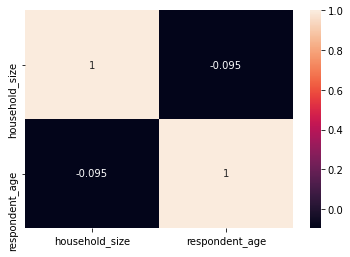

In [1348]:
sns.heatmap(df_n.corr(),annot=True)
plt.show()